In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:95%!important; }</style>"))

C:\Users\Playdata\AppData\Local\Temp\ipykernel_13916\999676280.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
data = pd.read_csv('archive/smoking.csv', index_col=0)
data.shape

(55692, 26)

In [7]:
data.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [16]:
X = data.drop('smoking', axis=1)
y = data['smoking']

In [17]:
X.shape, y.shape

((55692, 25), (55692,))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41769, 25) (13923, 25) (41769,) (13923,)


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31326, 25) (10443, 25) (31326,) (10443,)


## Data 전처리

In [3]:
#데이터 불러오기
X_train = pd.read_csv('archive/competition_format/x_train.csv', index_col=0)
X_test = pd.read_csv('archive/competition_format/x_test.csv', index_col=0)
y_train = pd.read_csv('archive/competition_format/y_train.csv', index_col=0)
y_test = pd.read_csv('archive/competition_format/y_test.csv', index_col=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(44553, 25) (11139, 25) (44553, 1) (11139, 1)


In [4]:
# 'oral' column drop
X_train.drop('oral', axis=1, inplace=True)
X_test.drop('oral', axis=1, inplace=True)

In [5]:
# 백분위 값 확인
X_train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.00000,44553.000000,44553.000000,44553.000000,...,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000,44553.000000
mean,44.210603,164.657038,65.883442,82.077247,1.011734,1.008134,1.02561,1.026036,121.529055,76.043454,...,126.721770,57.288421,115.037663,14.622194,1.087020,0.886097,26.213678,27.084731,40.065517,0.213521
std,12.089077,9.198571,12.823676,9.278288,0.488131,0.488762,0.15797,0.159245,13.688748,9.695288,...,71.611991,14.795235,40.937878,1.564872,0.404944,0.226092,19.087106,31.754805,50.723521,0.409797
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.00000,1.000000,71.000000,40.000000,...,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.00000,1.000000,112.000000,70.000000,...,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.00000,1.000000,120.000000,76.000000,...,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.00000,1.000000,130.000000,82.000000,...,160.000000,66.000000,136.000000,15.700000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.00000,2.000000,240.000000,146.000000,...,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


In [9]:
# 이상치 변환 함수 , 특정컬럼

def outHigh(df, a):
    to_75 = df[a].quantile(0.75)
    target = df[a].quantile(0.90)
    df[a] = df[a].apply(lambda x: to_75 if x >= target else x)

In [145]:
def outHigh2(df, a):
    to_75 = df[a].quantile(0.75)
    target = df[a].quantile(0.75)
    df[a] = df[a].apply(lambda x: to_75 if x >= target else x)

In [183]:
def outLow(df, a):
    to_75 = df[a].quantile(0.25)
    target = df[a].quantile(0.05)
    df[a] = df[a].apply(lambda x: to_75 if x <= target else x)

In [59]:
# 이상치 변환 함수 , DataFrame
outcols = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
        'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'dental caries']
for col in outcols:
    outHigh(X_train, str(col))
    outHigh(X_test, str(col))
    outHigh(X_val, str(col))

In [161]:
for col in outcols:
    outHigh(X_test, str(col))

In [15]:
# 'Gtp', 'triglyceride' ,'eyesight'이상치 상위 90% 이상 75% 값으로 변환
outcols = []
outHigh(X_train, 'Gtp')
outHigh(X_train, 'triglyceride')
outHigh(X_train, 'eyesight(right)')
outHigh(X_train, 'eyesight(left)')

outHigh(X_test, 'Gtp')
outHigh(X_test, 'triglyceride')
outHigh(X_test, 'eyesight(right)')
outHigh(X_test, 'eyesight(left)')

In [10]:
# ['Gtp','triglyceride' ] 컬럼만 이상치변환
cols = ['Gtp','triglyceride' ]
for col in cols:
    outHigh(X_train, str(col))
    outHigh(X_test, str(col))

In [184]:
cols = ['Gtp','triglyceride' ]
for col in cols:
    outLow(X_train, str(col))
    outLow(X_test, str(col))

In [8]:
# 처리 전 ['Gtp', 'triglyceride'] 백분위 값 확인
X_train[['Gtp', 'triglyceride']].describe()

,Gtp,triglyceride
count,31187.000000,31187.000000
mean,40.226857,126.306281
std,51.575895,71.364020
min,2.000000,15.000000
25%,17.000000,74.000000
50%,25.000000,108.000000
75%,44.000000,160.000000
max,999.000000,466.000000


In [11]:
# 처리 후 ['Gtp', 'triglyceride'] 백분위 값 확인
X_train[['Gtp', 'triglyceride']].describe()

,Gtp,triglyceride
count,31187.000000,31187.000000
mean,29.729471,113.591496
std,15.544283,47.395482
min,2.000000,15.000000
25%,17.000000,74.000000
50%,25.000000,108.000000
75%,44.000000,160.000000
max,77.000000,226.000000


In [27]:
# ['Gtp', 'triglyceride', 'eyesight(right)', 'eyesight(left)'] 백분위 값 확인
X_train[['Gtp', 'triglyceride', 'eyesight(right)', 'eyesight(left)']].describe()

,Gtp,triglyceride,eyesight(right),eyesight(left)
count,33414.000000,33414.000000,33414.000000,33414.000000
mean,29.725325,113.689531,0.948282,0.949758
std,15.542169,47.388993,0.259571,0.259891
min,2.000000,15.000000,0.100000,0.100000
25%,17.000000,74.000000,0.800000,0.800000
50%,25.000000,108.000000,1.000000,1.000000
75%,44.000000,160.000000,1.200000,1.200000
max,77.000000,226.000000,1.300000,1.300000


In [191]:
# 전체 백분위 값 확인
X_train.describe()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
count,33414.000000,3.341400e+04,3.341400e+04,33414.00000,3.341400e+04,33414.000000,33414.000000,33414.000000,33414.000000,3.341400e+04,...,33414.0,33414.0,3.341400e+04,33414.000000,33414.000000,33414.0,33414.0,33414.000000,33414.000000,33414.000000
mean,0.636709,inf,inf,inf,inf,1.013672,1.009766,1.025391,1.026367,inf,...,inf,inf,inf,1.085938,0.886719,inf,inf,28.210570,0.213135,0.554588
std,0.480955,1.213281e+01,9.195312e+00,12.84375,9.273438e+00,0.491455,0.480713,0.158813,0.159424,1.361719e+01,...,inf,inf,1.563477e+00,0.400391,0.230347,inf,inf,11.587303,0.409668,0.497019
min,0.000000,2.000000e+01,1.300000e+02,30.00000,5.100000e+01,0.099976,0.099976,1.000000,1.000000,7.100000e+01,...,11.0,1.0,4.898438e+00,1.000000,0.099976,6.0,1.0,12.000000,0.000000,0.000000
25%,0.000000,4.000000e+01,1.600000e+02,55.00000,7.600000e+01,0.799805,0.799805,1.000000,1.000000,1.120000e+02,...,47.0,92.0,1.360156e+01,1.000000,0.799805,19.0,15.0,17.000000,0.000000,0.000000
50%,1.000000,4.000000e+01,1.650000e+02,65.00000,8.200000e+01,1.000000,1.000000,1.000000,1.000000,1.200000e+02,...,55.0,113.0,1.479688e+01,1.000000,0.899902,23.0,21.0,25.000000,0.000000,1.000000
75%,1.000000,5.500000e+01,1.700000e+02,75.00000,8.800000e+01,1.200195,1.200195,1.000000,1.000000,1.300000e+02,...,66.0,136.0,1.570312e+01,1.000000,1.000000,28.0,31.0,44.000000,0.000000,1.000000
max,1.000000,8.500000e+01,1.900000e+02,135.00000,1.290000e+02,9.898438,9.898438,2.000000,2.000000,2.400000e+02,...,618.0,1860.0,2.109375e+01,6.000000,11.601562,1090.0,2914.0,44.000000,1.000000,1.000000


In [7]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31187, 24) (13366, 24) (31187, 1) (13366, 1)


In [25]:
# label encoder
from sklearn.preprocessing import LabelEncoder

def label(df, a):
    laencoder = LabelEncoder()
    afterEn = laencoder.fit_transform(df[[a]])
    return afterEn

In [26]:
# object column label encoder
X_train['gender'] = label(X_train,'gender')
X_test['gender'] = label(X_test,'gender')
X_val['gender'] = label(X_val,'gender')
X_train['tartar'] = label(X_train,'tartar')
X_test['tartar'] = label(X_test,'tartar')
X_val['tartar'] = label(X_val,'tartar')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 31624 to 47711
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               29238 non-null  int32  
 1   age                  29238 non-null  int64  
 2   height(cm)           29238 non-null  int64  
 3   weight(kg)           29238 non-null  int64  
 4   waist(cm)            29238 non-null  float64
 5   eyesight(left)       29238 non-null  float64
 6   eyesight(right)      29238 non-null  float64
 7   hearing(left)        29238 non-null  float64
 8   hearing(right)       29238 non-null  float64
 9   systolic             29238 non-null  float64
 10  relaxation           29238 non-null  float64
 11  fasting blood sugar  29238 non-null  float64
 12  Cholesterol          29238 non-null  float64
 13  triglyceride         29238 non-null  float64
 14  HDL                  29238 non-null  float64
 15  LDL                  29238 non-n

C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array w

In [27]:
# data type 변환 -> float16
X_train = X_train.astype('float16')
X_test = X_test.astype('float16')
X_val = X_val.astype('float16')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29238 entries, 31624 to 47711
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               29238 non-null  float16
 1   age                  29238 non-null  float16
 2   height(cm)           29238 non-null  float16
 3   weight(kg)           29238 non-null  float16
 4   waist(cm)            29238 non-null  float16
 5   eyesight(left)       29238 non-null  float16
 6   eyesight(right)      29238 non-null  float16
 7   hearing(left)        29238 non-null  float16
 8   hearing(right)       29238 non-null  float16
 9   systolic             29238 non-null  float16
 10  relaxation           29238 non-null  float16
 11  fasting blood sugar  29238 non-null  float16
 12  Cholesterol          29238 non-null  float16
 13  triglyceride         29238 non-null  float16
 14  HDL                  29238 non-null  float16
 15  LDL                  29238 non-n

## DecisionTree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from metrics import print_classification_metrics

In [32]:
tree = DecisionTreeClassifier(max_depth=15, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=0)

In [33]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)
pred_val = tree.predict(X_val)

In [31]:
#max_depth =7
print_classification_metrics(y_train, pred_train, title='DT_Train set에 대한 검증결과')
print_classification_metrics(y_test, pred_test, title='DT_Test set에 대한 검증결과')
print_classification_metrics(y_val, pred_val, title='DT_Validation set에 대한 검증결과')

DT_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7543843897767403
재현율/민감도(Recall): 0.699853228962818
정밀도(Precision): 0.6547410176214814
F1 점수(F1 Score): 0.6765459346549483
DT_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7497980070024239
재현율/민감도(Recall): 0.6943699731903485
정밀도(Precision): 0.6501597444089456
F1 점수(F1 Score): 0.6715380082498527
DT_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7395636951252357
재현율/민감도(Recall): 0.6883561643835616
정밀도(Precision): 0.6336410718306688
F1 점수(F1 Score): 0.6598663383749559


In [34]:
#max_depth =15
print_classification_metrics(y_train, pred_train, title='DT_Train set에 대한 검증결과')
print_classification_metrics(y_test, pred_test, title='DT_Test set에 대한 검증결과')
print_classification_metrics(y_val, pred_val, title='DT_Validation set에 대한 검증결과')

DT_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8912132639013587
재현율/민감도(Recall): 0.8408349641226354
정밀도(Precision): 0.859691538140892
F1 점수(F1 Score): 0.8501587039861496
DT_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8264655714157465
재현율/민감도(Recall): 0.7233731416037046
정밀도(Precision): 0.7881040892193308
F1 점수(F1 Score): 0.7543525225568687
DT_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7041924768830237
재현율/민감도(Recall): 0.5902641878669276
정밀도(Precision): 0.5983139102405157
F1 점수(F1 Score): 0.594261790419899


### Scaled Decision Tree

In [35]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled1 = s_scaler.fit_transform(X_train)
X_val_scaled1 = s_scaler.transform(X_val)
X_test_scaled1 = s_scaler.transform(X_test)

In [66]:
tree = DecisionTreeClassifier(max_depth=15, random_state=0)
tree.fit(X_train_scaled1, y_train)

DecisionTreeClassifier(max_depth=15, random_state=0)

In [67]:
s_pred_train = tree.predict(X_train_scaled1)
s_pred_test = tree.predict(X_test_scaled1)
s_pred_val = tree.predict(X_val_scaled1)

In [39]:
#max_depth =7
print_classification_metrics(y_train, s_pred_train, title='DT_S_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_pred_test, title='DT_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_pred_val, title='DT_S_Validation set에 대한 검증결과')

DT_S_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.6980008379721075
재현율/민감도(Recall): 0.9559686888454012
정밀도(Precision): 0.551069330199765
F1 점수(F1 Score): 0.6991263901726349
DT_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7070652661818835
재현율/민감도(Recall): 0.9617353156227151
정밀도(Precision): 0.5595575723199092
F1 점수(F1 Score): 0.7074854325414612
DT_S_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.702845856899183
재현율/민감도(Recall): 0.9603718199608611
정밀도(Precision): 0.5549901046084252
F1 점수(F1 Score): 0.7034581616197814


In [68]:
#max_depth =15
print_classification_metrics(y_train, s_pred_train, title='DT_S_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_pred_test, title='DT_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_pred_val, title='DT_S_Validation set에 대한 검증결과')

DT_S_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8912132639013587
재현율/민감도(Recall): 0.8408349641226354
정밀도(Precision): 0.859691538140892
F1 점수(F1 Score): 0.8501587039861496
DT_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8264655714157465
재현율/민감도(Recall): 0.7231294174993906
정밀도(Precision): 0.7882571732199788
F1 점수(F1 Score): 0.754290072454557
DT_S_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7033845048927193
재현율/민감도(Recall): 0.5885518590998043
정밀도(Precision): 0.5973187686196624
F1 점수(F1 Score): 0.5929029078363727


## RandomForestClassifier

In [179]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score

In [122]:
rf = RandomForestClassifier(n_estimators=300, max_depth=22, random_state=0) #모델

rf.fit(X_train, y_train)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10172\4094858274.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=22, n_estimators=300, random_state=0)

In [123]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
rf_pred_val = rf.predict(X_val)

In [115]:
fi = rf.feature_importances_
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)

gender                 0.118876
Gtp                    0.088274
hemoglobin             0.087105
triglyceride           0.066756
height(cm)             0.063075
LDL                    0.051803
waist(cm)              0.050124
Cholesterol            0.050026
HDL                    0.048929
ALT                    0.046615
fasting blood sugar    0.046229
systolic               0.043464
AST                    0.041553
relaxation             0.040791
weight(kg)             0.034635
age                    0.033113
serum creatinine       0.029022
eyesight(left)         0.024603
eyesight(right)        0.024602
tartar                 0.010405
hearing(right)         0.000000
hearing(left)          0.000000
Urine protein          0.000000
dental caries          0.000000
dtype: float64

In [61]:
#max_depth =7
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7653378823247741
재현율/민감도(Recall): 0.7392367906066536
정밀도(Precision): 0.6613173827412648
F1 점수(F1 Score): 0.6981095753282255
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7590447975581291
재현율/민감도(Recall): 0.7223982451864489
정밀도(Precision): 0.6573519627411843
F1 점수(F1 Score): 0.688341848583372
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7487207110153514
재현율/민감도(Recall): 0.7201565557729941
정밀도(Precision): 0.6401391606871059
F1 점수(F1 Score): 0.6777944054334062


In [64]:
#max_depth =15
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9386484707009038
재현율/민감도(Recall): 0.9415362035225049
정밀도(Precision): 0.8965062111801242
F1 점수(F1 Score): 0.9184696150174992
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8939761199389532
재현율/민감도(Recall): 0.8856933950767731
정밀도(Precision): 0.8361711919005983
F1 점수(F1 Score): 0.8602201443957865
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7583266002334141
재현율/민감도(Recall): 0.7255381604696673
정밀도(Precision): 0.6538800705467372
F1 점수(F1 Score): 0.6878478664192951


In [70]:
#max_depth =22
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9992817381935716
재현율/민감도(Recall): 0.9991846053489889
정밀도(Precision): 0.9988588196935115
F1 점수(F1 Score): 0.9990216859611936
RF_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9371577340874405
재현율/민감도(Recall): 0.9271264928101389
정밀도(Precision): 0.9046373365041617
F1 점수(F1 Score): 0.915743861338469
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7592243468893078
재현율/민감도(Recall): 0.7216242661448141
정밀도(Precision): 0.6564307966177125
F1 점수(F1 Score): 0.6874854346306224


### 전체 이상치 제거 후 RandomForestClassifier

In [66]:
rf = RandomForestClassifier(n_estimators=300, max_depth=32, random_state=0) #모델

rf.fit(X_train, y_train)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6852\3094551497.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=32, n_estimators=300, random_state=0)

In [67]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
rf_pred_val = rf.predict(X_val)

In [56]:
#max_depth =7
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7644699826420064
재현율/민감도(Recall): 0.7356490541422048
정밀도(Precision): 0.660952380952381
F1 점수(F1 Score): 0.6963031565948908
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7602118682107909
재현율/민감도(Recall): 0.7253229344382159
정밀도(Precision): 0.6584070796460177
F1 점수(F1 Score): 0.6902470138003015
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7470149923691535
재현율/민감도(Recall): 0.7179549902152642
정밀도(Precision): 0.6380434782608696
F1 점수(F1 Score): 0.6756445672191528


In [62]:
#max_depth =15
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9448434787813491
재현율/민감도(Recall): 0.9525440313111546
정밀도(Precision): 0.9025728192845553
F1 점수(F1 Score): 0.9268853889792517
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8928090492862915
재현율/민감도(Recall): 0.8900804289544236
정밀도(Precision): 0.8309442548350399
F1 점수(F1 Score): 0.859496352082843
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.75320944429482
재현율/민감도(Recall): 0.7218688845401174
정밀도(Precision): 0.6467236467236467
F1 점수(F1 Score): 0.6822332678303087


In [65]:
#max_depth =22
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9991321003172323
재현율/민감도(Recall): 0.9998369210697978
정밀도(Precision): 0.9978029131743836
F1 점수(F1 Score): 0.9988188816030628
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9340156207918126
재현율/민감도(Recall): 0.9273702169144529
정밀도(Precision): 0.896982555398397
F1 점수(F1 Score): 0.9119233073696824
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7542867402818925
재현율/민감도(Recall): 0.7130626223091977
정밀도(Precision): 0.6508149140433133
F1 점수(F1 Score): 0.6805182677716821


### GTP, Triglyceride 이상치 변환 후 RandomForestClassfier

In [113]:
fi = rf.feature_importances_
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)

gender                 0.118876
Gtp                    0.088274
hemoglobin             0.087105
triglyceride           0.066756
height(cm)             0.063075
LDL                    0.051803
waist(cm)              0.050124
Cholesterol            0.050026
HDL                    0.048929
ALT                    0.046615
fasting blood sugar    0.046229
systolic               0.043464
AST                    0.041553
relaxation             0.040791
weight(kg)             0.034635
age                    0.033113
serum creatinine       0.029022
eyesight(left)         0.024603
eyesight(right)        0.024602
tartar                 0.010405
hearing(right)         0.000000
hearing(left)          0.000000
Urine protein          0.000000
dental caries          0.000000
dtype: float64

In [238]:
rf = RandomForestClassifier(n_estimators=300, max_depth= 15, random_state=0) #모델

rf.fit(X_train, y_train)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_10172\2404085241.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=300, random_state=0)

In [239]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
rf_pred_val = rf.predict(X_val)

In [213]:
#max_depth = 7
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7656371580774526
재현율/민감도(Recall): 0.7384213959556425
정밀도(Precision): 0.6620366985890781
F1 점수(F1 Score): 0.6981459353197395
RF_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7603914175419697
재현율/민감도(Recall): 0.7199610041433098
정밀도(Precision): 0.6602592758158248
F1 점수(F1 Score): 0.6888189343593332
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7494389083400664
재현율/민감도(Recall): 0.7196673189823874
정밀도(Precision): 0.6413778068454328
F1 점수(F1 Score): 0.6782708933717579


In [210]:
#max_depth =15
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9379002813192076
재현율/민감도(Recall): 0.9438193085453359
정밀도(Precision): 0.8930638068050305
F1 점수(F1 Score): 0.9177403369672944
RF_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8951431905916151
재현율/민감도(Recall): 0.8869120155983427
정밀도(Precision): 0.8379000690766751
F1 점수(F1 Score): 0.8617096850580156
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7622766855193465
재현율/민감도(Recall): 0.7301859099804305
정밀도(Precision): 0.6589403973509934
F1 점수(F1 Score): 0.6927361336737062


In [216]:
#max_depth =22
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9988627521398217
재현율/민감도(Recall): 0.9985322896281801
정밀도(Precision): 0.9983694766019893
F1 점수(F1 Score): 0.9984508764777823
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9361702127659575
재현율/민감도(Recall): 0.9232269071411162
정밀도(Precision): 0.9053537284894837
F1 점수(F1 Score): 0.9142029685048871
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7611096148666846
재현율/민감도(Recall): 0.7174657534246576
정밀도(Precision): 0.6607343996395585
F1 점수(F1 Score): 0.6879324498651344


In [209]:
from metrics import print_classification_metrics
#test
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9379002813192076
재현율/민감도(Recall): 0.9438193085453359
정밀도(Precision): 0.8930638068050305
F1 점수(F1 Score): 0.9177403369672944
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8951431905916151
재현율/민감도(Recall): 0.8869120155983427
정밀도(Precision): 0.8379000690766751
F1 점수(F1 Score): 0.8617096850580156
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7622766855193465
재현율/민감도(Recall): 0.7301859099804305
정밀도(Precision): 0.6589403973509934
F1 점수(F1 Score): 0.6927361336737062


In [44]:
def display_roc_curve(y, pred_proba, title=None):
    """
    ROC curve, sorce
    [parameter]
    """
    print('='*50)
    print('roc-auc score')
    print('='*50)
    roc_auc = roc_auc_score(y,pred_proba)
    print(roc_auc)
    print('='*50)
    fpr, tpr, _ = roc_curve(y, pred_proba)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    disp.plot()
    if title:
        plt.title(title)
    plt.show()

In [243]:
proba_train_rf = rf.predict_proba(X_train)[:,1]
proba_val_rf = rf.predict_proba(X_val)[:,1]
proba_test_rf = rf.predict_proba(X_test)[:,1]

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

roc-auc score
0.8414920674393245


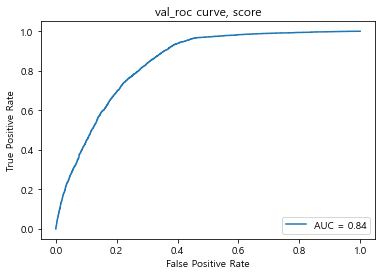

roc-auc score
0.9587694745466266


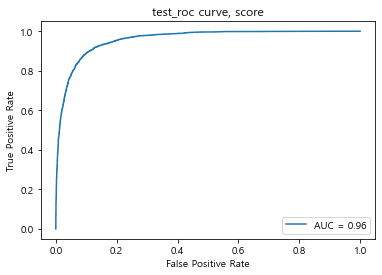

In [244]:
display_roc_curve(y_val, proba_val_rf, title='val_roc curve, score')
display_roc_curve(y_test, proba_test_rf, title='test_roc curve, score')

In [119]:
X_train.describe()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar
count,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,...,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000,33414.000000
mean,0.636709,44.146914,164.674538,65.887053,82.055070,1.012911,1.008885,1.025917,1.026097,121.500389,...,57.339738,115.145029,14.625121,1.086042,0.886111,26.185282,27.098911,29.725325,0.213054,0.554588
std,0.480955,12.128239,9.195460,12.846121,9.274562,0.491560,0.480613,0.158891,0.159426,13.621440,...,14.922364,42.106931,1.563467,0.400432,0.230407,18.209732,32.014832,15.542169,0.409472,0.497019
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,11.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,0.000000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,1.000000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,1.000000
75%,1.000000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.700000,1.000000,1.000000,28.000000,31.000000,44.000000,0.000000,1.000000
max,1.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,77.000000,1.000000,1.000000


### Scaled RandomForestClassifie

In [71]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled1 = s_scaler.fit_transform(X_train)
X_val_scaled1 = s_scaler.transform(X_val)
X_test_scaled1 = s_scaler.transform(X_test)

In [75]:
rf = RandomForestClassifier(n_estimators=300, max_depth=22, random_state=0) #모델

rf.fit(X_train_scaled1, y_train)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7284\2475025025.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled1, y_train)


RandomForestClassifier(max_depth=22, n_estimators=300, random_state=0)

In [76]:
s_rf_pred_train = rf.predict(X_train_scaled1)
s_rf_pred_test = rf.predict(X_test_scaled1)
s_rf_pred_val = rf.predict(X_val_scaled1)

In [74]:
#max_depth =15
print_classification_metrics(y_train, s_rf_pred_train, title='Scaled_RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_rf_pred_test, title='Scaled_RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_rf_pred_val, title='Scaled_RF_Validation set에 대한 검증결과')

Scaled_RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9387083258514395
재현율/민감도(Recall): 0.9415362035225049
정밀도(Precision): 0.8966454418387948
F1 점수(F1 Score): 0.9185426775912816
Scaled_RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.894155669270132
재현율/민감도(Recall): 0.885937119181087
정밀도(Precision): 0.8364012885411873
F1 점수(F1 Score): 0.860456858799858
Scaled_RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7592243468893078
재현율/민감도(Recall): 0.7282289628180039
정밀도(Precision): 0.6545734388742305
F1 점수(F1 Score): 0.6894395553496989


In [77]:
#max_depth =22
print_classification_metrics(y_train, s_rf_pred_train, title='Scaled_RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_rf_pred_test, title='Scaled_RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_rf_pred_val, title='Scaled_RF_Validation set에 대한 검증결과')

Scaled_RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9992817381935716
재현율/민감도(Recall): 0.9991846053489889
정밀도(Precision): 0.9988588196935115
F1 점수(F1 Score): 0.9990216859611936
Scaled_RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9363497620971362
재현율/민감도(Recall): 0.9251766999756276
정밀도(Precision): 0.9042401143401619
F1 점수(F1 Score): 0.9145886037826767
Scaled_RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7594038962204865
재현율/민감도(Recall): 0.7204011741682974
정밀도(Precision): 0.6570727353859884
F1 점수(F1 Score): 0.6872812135355892


### 전체 이상치 제거 Scaled RandomForestClassifier 

In [69]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled1 = s_scaler.fit_transform(X_train)
X_val_scaled1 = s_scaler.transform(X_val)
X_test_scaled1 = s_scaler.transform(X_test)

In [76]:
rf = RandomForestClassifier(n_estimators=300, max_depth=22, random_state=0) #모델

rf.fit(X_train_scaled1, y_train)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6852\2475025025.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled1, y_train)


RandomForestClassifier(max_depth=22, n_estimators=300, random_state=0)

In [77]:
s_rf_pred_train = rf.predict(X_train_scaled1)
s_rf_pred_test = rf.predict(X_test_scaled1)
s_rf_pred_val = rf.predict(X_val_scaled1)

In [72]:
#max_depth =7
print_classification_metrics(y_train, s_rf_pred_train, title='Scaled_RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_rf_pred_test, title='Scaled_RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_rf_pred_val, title='Scaled_RF_Validation set에 대한 검증결과')

Scaled_RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7644999102172741
재현율/민감도(Recall): 0.7356490541422048
정밀도(Precision): 0.6610008059198476
F1 점수(F1 Score): 0.6963300273993748
Scaled_RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7603016428763802
재현율/민감도(Recall): 0.7253229344382159
정밀도(Precision): 0.6585527771630891
F1 점수(F1 Score): 0.6903270702853166
Scaled_RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7471047670347428
재현율/민감도(Recall): 0.7181996086105675
정밀도(Precision): 0.6381221473592698
F1 점수(F1 Score): 0.6757969846932904


In [75]:
#max_depth =15
print_classification_metrics(y_train, s_rf_pred_train, title='Scaled_RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_rf_pred_test, title='Scaled_RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_rf_pred_val, title='Scaled_RF_Validation set에 대한 검증결과')

Scaled_RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9449931166576884
재현율/민감도(Recall): 0.9527886497064579
정밀도(Precision): 0.9027348578491965
F1 점수(F1 Score): 0.9270866391621707
Scaled_RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8929885986174702
재현율/민감도(Recall): 0.8895929807457957
정밀도(Precision): 0.8316245158350422
F1 점수(F1 Score): 0.8596325953838906
Scaled_RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7535685429571775
재현율/민감도(Recall): 0.7218688845401174
정밀도(Precision): 0.6472910726036412
F1 점수(F1 Score): 0.6825488608766046


In [78]:
#max_depth =22
print_classification_metrics(y_train, s_rf_pred_train, title='Scaled_RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_rf_pred_test, title='Scaled_RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_rf_pred_val, title='Scaled_RF_Validation set에 대한 검증결과')

Scaled_RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9991021727419644
재현율/민감도(Recall): 0.9998369210697978
정밀도(Precision): 0.9977217249796583
F1 점수(F1 Score): 0.9987782031440906
Scaled_RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9339258461262232
재현율/민감도(Recall): 0.9271264928101389
정밀도(Precision): 0.8969582645602452
F1 점수(F1 Score): 0.9117929050814956
Scaled_RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7543765149474818
재현율/민감도(Recall): 0.7115949119373777
정밀도(Precision): 0.6513658755038065
F1 점수(F1 Score): 0.6801496375964461


### GTP, Triglyceride 이상치 변환 후  Scaled RandomForestClassfie

In [120]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled1 = s_scaler.fit_transform(X_train)
X_val_scaled1 = s_scaler.transform(X_val)
X_test_scaled1 = s_scaler.transform(X_test)

In [125]:
rf = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=0) #모델

rf.fit(X_train_scaled1, y_train)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6852\1393781597.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled1, y_train)


RandomForestClassifier(max_depth=15, n_estimators=300, random_state=0)

In [126]:
s_rf_pred_train = rf.predict(X_train_scaled1)
s_rf_pred_test = rf.predict(X_test_scaled1)
s_rf_pred_val = rf.predict(X_val_scaled1)

In [127]:
#max_depth =15
print_classification_metrics(y_train, s_rf_pred_train, title='Scaled_RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_rf_pred_test, title='Scaled_RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_rf_pred_val, title='Scaled_RF_Validation set에 대한 검증결과')

Scaled_RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9349089848046147
재현율/민감도(Recall): 0.9434931506849316
정밀도(Precision): 0.8864628820960698
F1 점수(F1 Score): 0.9140893470790379
Scaled_RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9311428314929527
재현율/민감도(Recall): 0.9405313185474043
정밀도(Precision): 0.8806481058877225
F1 점수(F1 Score): 0.9096051856216852
Scaled_RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9361702127659575
재현율/민감도(Recall): 0.9522994129158513
정밀도(Precision): 0.8829666591063733
F1 점수(F1 Score): 0.9163234082617394


## Gradient Boosting

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from metrics import print_classification_metrics

In [85]:
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.5, n_estimators=300)

gb.fit(X_train, y_train)

C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.5, n_estimators=300, random_state=0)

In [86]:
gb_pred_train = gb.predict(X_train)
gb_pred_test = gb.predict(X_test)
gb_pred_val = gb.predict(X_val)

In [81]:
# learning_rate=0.05
print_classification_metrics(y_train, gb_pred_train, title='Gradient Boosting_Train set에 대한 검증결과')
print_classification_metrics(y_test, gb_pred_test, title='Gradient Boosting_Test set에 대한 검증결과')
print_classification_metrics(y_val, gb_pred_val, title='Gradient Boosting_Val set에 대한 검증결과')

Gradient Boosting_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7767702160770934
재현율/민감도(Recall): 0.7333659491193738
정밀도(Precision): 0.682242281726466
F1 점수(F1 Score): 0.7068809682870281
Gradient Boosting_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7722416733997666
재현율/민감도(Recall): 0.7041189373629052
정밀도(Precision): 0.6858974358974359
F1 점수(F1 Score): 0.6948887552615756
Gradient Boosting_Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7642517281623126
재현율/민감도(Recall): 0.7248043052837574
정밀도(Precision): 0.6637544802867383
F1 점수(F1 Score): 0.6929373246024322


In [84]:
# learning_rate=0.1
print_classification_metrics(y_train, gb_pred_train, title='Gradient Boosting_Train set에 대한 검증결과')
print_classification_metrics(y_test, gb_pred_test, title='Gradient Boosting_Test set에 대한 검증결과')
print_classification_metrics(y_val, gb_pred_val, title='Gradient Boosting_Val set에 대한 검증결과')

Gradient Boosting_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7860178368348596
재현율/민감도(Recall): 0.7393183300717547
정밀도(Precision): 0.6963901689708142
F1 점수(F1 Score): 0.7172124663819016
Gradient Boosting_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.777179280007182
재현율/민감도(Recall): 0.7041189373629052
정밀도(Precision): 0.6949723358191003
F1 점수(F1 Score): 0.6995157384987893
Gradient Boosting_Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7642517281623126
재현율/민감도(Recall): 0.7179549902152642
정밀도(Precision): 0.6658348457350273
F1 점수(F1 Score): 0.6909133709981169


In [87]:
# learning_rate=0.5
print_classification_metrics(y_train, gb_pred_train, title='Gradient Boosting_Train set에 대한 검증결과')
print_classification_metrics(y_test, gb_pred_test, title='Gradient Boosting_Test set에 대한 검증결과')
print_classification_metrics(y_val, gb_pred_val, title='Gradient Boosting_Val set에 대한 검증결과')

Gradient Boosting_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8293230382474412
재현율/민감도(Recall): 0.7804142204827136
정밀도(Precision): 0.7607503378109848
F1 점수(F1 Score): 0.7704568323606359
Gradient Boosting_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8054582996678338
재현율/민감도(Recall): 0.7221545210821351
정밀도(Precision): 0.7426065162907268
F1 점수(F1 Score): 0.7322377363153342
Gradient Boosting_Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.748361612352994
재현율/민감도(Recall): 0.6768590998043053
정밀도(Precision): 0.6512120498940928
F1 점수(F1 Score): 0.6637879333093438


### Scaled Gradient Boosting

In [88]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled1 = s_scaler.fit_transform(X_train)
X_val_scaled1 = s_scaler.transform(X_val)
X_test_scaled1 = s_scaler.transform(X_test)

In [95]:
gb = GradientBoostingClassifier(random_state=0, learning_rate=0.5, n_estimators=300)

gb.fit(X_train_scaled1, y_train)

C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.5, n_estimators=300, random_state=0)

In [96]:
s_gb_pred_train = gb.predict(X_train_scaled1)
s_gb_pred_test = gb.predict(X_test_scaled1)
s_gb_pred_val = gb.predict(X_val_scaled1)

In [91]:
# learning_rate=0.05
print_classification_metrics(y_train, s_gb_pred_train, title='Scaled Gradient Boosting_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_gb_pred_test, title='Scaled Gradient Boosting_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_gb_pred_val, title='Scaled Gradient Boosting_Val set에 대한 검증결과')

Scaled Gradient Boosting_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7767702160770934
재현율/민감도(Recall): 0.7333659491193738
정밀도(Precision): 0.682242281726466
F1 점수(F1 Score): 0.7068809682870281
Scaled Gradient Boosting_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7722416733997666
재현율/민감도(Recall): 0.7041189373629052
정밀도(Precision): 0.6858974358974359
F1 점수(F1 Score): 0.6948887552615756
Scaled Gradient Boosting_Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7643415028279019
재현율/민감도(Recall): 0.7250489236790607
정밀도(Precision): 0.6638297872340425
F1 점수(F1 Score): 0.6930901438091898


In [94]:
# learning_rate=0.1
print_classification_metrics(y_train, s_gb_pred_train, title='Scaled Gradient Boosting_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_gb_pred_test, title='Scaled Gradient Boosting_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_gb_pred_val, title='Scaled Gradient Boosting_Val set에 대한 검증결과')

Scaled Gradient Boosting_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7860178368348596
재현율/민감도(Recall): 0.7393183300717547
정밀도(Precision): 0.6963901689708142
F1 점수(F1 Score): 0.7172124663819016
Scaled Gradient Boosting_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.777179280007182
재현율/민감도(Recall): 0.7041189373629052
정밀도(Precision): 0.6949723358191003
F1 점수(F1 Score): 0.6995157384987893
Scaled Gradient Boosting_Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7641619534967232
재현율/민감도(Recall): 0.7177103718199609
정밀도(Precision): 0.6657590197413207
F1 점수(F1 Score): 0.6907592701589171


In [97]:
# learning_rate=0.5
print_classification_metrics(y_train, s_gb_pred_train, title='Scaled Gradient Boosting_Train set에 대한 검증결과')
print_classification_metrics(y_test, s_gb_pred_test, title='Scaled Gradient Boosting_Test set에 대한 검증결과')
print_classification_metrics(y_val, s_gb_pred_val, title='Scaled Gradient Boosting_Val set에 대한 검증결과')

Scaled Gradient Boosting_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8293230382474412
재현율/민감도(Recall): 0.7804142204827136
정밀도(Precision): 0.7607503378109848
F1 점수(F1 Score): 0.7704568323606359
Scaled Gradient Boosting_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8053685250022443
재현율/민감도(Recall): 0.7221545210821351
정밀도(Precision): 0.7424204460035079
F1 점수(F1 Score): 0.7321472695824067
Scaled Gradient Boosting_Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7482718376874046
재현율/민감도(Recall): 0.6771037181996086
정밀도(Precision): 0.6509877704609596
F1 점수(F1 Score): 0.6637889688249401


## XGB

In [98]:
from xgboost import XGBClassifier

In [111]:
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=30, random_state=0)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=30, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [112]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)
xgb_pred_val = xgb.predict(X_val)

In [107]:
#max_depth = 3
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7851798647273598
재현율/민감도(Recall): 0.7429876060013046
정밀도(Precision): 0.69356066372355
F1 점수(F1 Score): 0.7174238248956776
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7763713080168776
재현율/민감도(Recall): 0.7058250060931026
정밀도(Precision): 0.692822966507177
F1 점수(F1 Score): 0.6992635518531932
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7635335308375977
재현율/민감도(Recall): 0.7186888454011742
정밀도(Precision): 0.6644052464947987
F1 점수(F1 Score): 0.69048178613396


In [101]:
#max_depth = 7
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9047405279224278
재현율/민감도(Recall): 0.8858447488584474
정밀도(Precision): 0.8590179489206926
F1 점수(F1 Score): 0.8722251214322989
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8611185923332435
재현율/민감도(Recall): 0.806970509383378
정밀도(Precision): 0.8143138219380226
F1 점수(F1 Score): 0.8106255355612682
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7586856988957716
재현율/민감도(Recall): 0.7015655577299413
정밀도(Precision): 0.6614391143911439
F1 점수(F1 Score): 0.680911680911681


In [104]:
#max_depth = 15
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9309632821617739
재현율/민감도(Recall): 0.9061662198391421
정밀도(Precision): 0.9063871282301317
F1 점수(F1 Score): 0.9062766605728216
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.750785528323907
재현율/민감도(Recall): 0.6861545988258317
정밀도(Precision): 0.652629129827827
F1 점수(F1 Score): 0.6689720963510614


### 전체 이상치 제거 후 XGB

In [79]:
from xgboost import XGBClassifier

In [107]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [87]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)
xgb_pred_val = xgb.predict(X_val)

In [82]:
#max_depth = 3
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7776381157598611
재현율/민감도(Recall): 0.7346705805609915
정밀도(Precision): 0.6833004701956621
F1 점수(F1 Score): 0.7080550098231828
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7689200107729599
재현율/민감도(Recall): 0.699000731172313
정밀도(Precision): 0.6817209412883289
F1 점수(F1 Score): 0.6902527075812275
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.758775473561361
재현율/민감도(Recall): 0.7103718199608611
정밀도(Precision): 0.6589516678012253
F1 점수(F1 Score): 0.6836962919364332


In [85]:
#max_depth = 3, n_estimators=500
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7866463159154845
재현율/민감도(Recall): 0.7420091324200914
정밀도(Precision): 0.6965174129353234
F1 점수(F1 Score): 0.7185439614670931
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7743064907083221
재현율/민감도(Recall): 0.6992444552766268
정밀도(Precision): 0.6914919257652447
F1 점수(F1 Score): 0.6953465826466312
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7577879522398779
재현율/민감도(Recall): 0.7069471624266145
정밀도(Precision): 0.6583143507972665
F1 점수(F1 Score): 0.6817645671148855


### Gtp, Triglyceride 컬럼 이상치 제거 후 XGB 

In [41]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=15, random_state=0)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [57]:
xgb_pred_train = xgb.predict(X_train)
xgb_pred_test = xgb.predict(X_test)
xgb_pred_val = xgb.predict(X_val)

In [237]:
#max_depth = 3, learning_rate=0.5
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7890704495121805
재현율/민감도(Recall): 0.7385029354207436
정밀도(Precision): 0.7022018917661653
F1 점수(F1 Score): 0.7198950798823622
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.774755364036269
재현율/민감도(Recall): 0.6670728735071899
정밀도(Precision): 0.7054123711340207
F1 점수(F1 Score): 0.6857071276462483
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7603016428763802
재현율/민감도(Recall): 0.7040117416829745
정밀도(Precision): 0.6634393729829414
F1 점수(F1 Score): 0.6831236648469025


In [247]:
#max_depth = 3
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7698569461902197
재현율/민감도(Recall): 0.7352413568166993
정밀도(Precision): 0.6699108469539375
F1 점수(F1 Score): 0.7010573783237443
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7681120387826555
재현율/민감도(Recall): 0.6880331464781867
정밀도(Precision): 0.6841977702375182
F1 점수(F1 Score): 0.6861100984323734
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.762905108178472
재현율/민감도(Recall): 0.7316536203522505
정밀도(Precision): 0.6595369349503859
F1 점수(F1 Score): 0.6937260814101821


In [225]:
#max_depth = 7
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8393787035374394
재현율/민감도(Recall): 0.8125407697325505
정밀도(Precision): 0.7645975600398988
F1 점수(F1 Score): 0.7878404553899672
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.813986892898824
재현율/민감도(Recall): 0.7348281745064587
정밀도(Precision): 0.7539384846211553
F1 점수(F1 Score): 0.7442606763762035
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7633539815064189
재현율/민감도(Recall): 0.7142857142857143
정밀도(Precision): 0.6654512306289881
F1 점수(F1 Score): 0.6890042472864559


In [222]:
#max_depth = 10
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9325731729215299
재현율/민감도(Recall): 0.9287345075016308
정밀도(Precision): 0.8920040723627536
F1 점수(F1 Score): 0.9099988015819118
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8768291588113835
재현율/민감도(Recall): 0.8281745064586887
정밀도(Precision): 0.8359163591635916
F1 점수(F1 Score): 0.8320274240940254
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7550049376066074
재현율/민감도(Recall): 0.6954500978473581
정밀도(Precision): 0.6570372082274093
F1 점수(F1 Score): 0.6756981580510993


In [228]:
#max_depth = 15
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9996408690967857
재현율/민감도(Recall): 0.9998369210697978
정밀도(Precision): 0.9991851368970013
F1 점수(F1 Score): 0.9995109227257907
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9265643235478948
재현율/민감도(Recall): 0.8964172556665855
정밀도(Precision): 0.9034635224760501
F1 점수(F1 Score): 0.899926596525569
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.747643415028279
재현율/민감도(Recall): 0.6841976516634051
정밀도(Precision): 0.6479036367848042
F1 점수(F1 Score): 0.6655562165377751


In [45]:
#max_depth = 3 , 다른 데이터 분리
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7739927491620494
재현율/민감도(Recall): 0.7415029332340068
정밀도(Precision): 0.6751165748198389
F1 점수(F1 Score): 0.7067542380402946
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7623357035121741
재현율/민감도(Recall): 0.7258506061791161
정밀도(Precision): 0.6606157679302367
F1 점수(F1 Score): 0.6916984999534147
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7625887798260315
재현율/민감도(Recall): 0.7299000434593655
정밀도(Precision): 0.6597917894323315
F1 점수(F1 Score): 0.693077478592799


In [48]:
#max_depth = 15 , 다른 데이터 분리
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9998973938025857
재현율/민감도(Recall): 0.9999068814600987
정밀도(Precision): 0.9998137802607077
F1 점수(F1 Score): 0.9998603286931421
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7982475041298571
재현율/민감도(Recall): 0.7430582714118107
정밀도(Precision): 0.7176581680830972
F1 점수(F1 Score): 0.7301373811124988
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7995371478732742
재현율/민감도(Recall): 0.7507605388961321
정밀도(Precision): 0.716804979253112
F1 점수(F1 Score): 0.7333899384419443


In [55]:
#max_depth = 15 , 다른 데이터 분리, n_estimators=500, learning_rate=0.05
print_classification_metrics(y_train, xgb_pred_train, "XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, xgb_pred_test, 'XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, xgb_pred_val, 'XGB Val set에 대한 검증결과')

XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8004740357681535
재현율/민감도(Recall): 0.748337895971842
정밀도(Precision): 0.7196314403911245
F1 점수(F1 Score): 0.7337039877300614
XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.800734179235496
재현율/민감도(Recall): 0.7538026944806606
정밀도(Precision): 0.7177736395613491
F1 점수(F1 Score): 0.7353471118177001


### Scaled XGB

In [114]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train_scaled1 = s_scaler.fit_transform(X_train)
X_val_scaled1 = s_scaler.transform(X_val)
X_test_scaled1 = s_scaler.transform(X_test)

In [121]:
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=15, random_state=0)

xgb.fit(X_train_scaled1, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [122]:
s_xgb_pred_train = xgb.predict(X_train_scaled1)
s_xgb_pred_test = xgb.predict(X_test_scaled1)
s_xgb_pred_val = xgb.predict(X_val_scaled1)

In [117]:
#max_depth = 3
print_classification_metrics(y_train, s_xgb_pred_train, "Scaled XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, s_xgb_pred_test, 'Scaled XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, s_xgb_pred_val, 'Scaled XGB Val set에 대한 검증결과')

Scaled XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7851798647273598
재현율/민감도(Recall): 0.7429876060013046
정밀도(Precision): 0.69356066372355
F1 점수(F1 Score): 0.7174238248956776
Scaled XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7763713080168776
재현율/민감도(Recall): 0.7058250060931026
정밀도(Precision): 0.692822966507177
F1 점수(F1 Score): 0.6992635518531932
Scaled XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7635335308375977
재현율/민감도(Recall): 0.7186888454011742
정밀도(Precision): 0.6644052464947987
F1 점수(F1 Score): 0.69048178613396


In [120]:
#max_depth = 7
print_classification_metrics(y_train, s_xgb_pred_train, "Scaled XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, s_xgb_pred_test, 'Scaled XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, s_xgb_pred_val, 'Scaled XGB Val set에 대한 검증결과')

Scaled XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9047405279224278
재현율/민감도(Recall): 0.8858447488584474
정밀도(Precision): 0.8590179489206926
F1 점수(F1 Score): 0.8722251214322989
Scaled XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8610288176676542
재현율/민감도(Recall): 0.806726785279064
정밀도(Precision): 0.8142681426814268
F1 점수(F1 Score): 0.8104799216454456
Scaled XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7586856988957716
재현율/민감도(Recall): 0.7015655577299413
정밀도(Precision): 0.6614391143911439
F1 점수(F1 Score): 0.680911680911681


In [123]:
#max_depth = 15
print_classification_metrics(y_train, s_xgb_pred_train, "Scaled XGB Train set에 대한 검증결과")
print_classification_metrics(y_test, s_xgb_pred_test, 'Scaled XGB Test set에 대한 검증결과')
print_classification_metrics(y_val, s_xgb_pred_val, 'Scaled XGB Val set에 대한 검증결과')

Scaled XGB Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
Scaled XGB Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9308735074961846
재현율/민감도(Recall): 0.9059224957348282
정밀도(Precision): 0.9063643013899049
F1 점수(F1 Score): 0.9061433447098977
Scaled XGB Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7512344016518538
재현율/민감도(Recall): 0.6866438356164384
정밀도(Precision): 0.6532464510123341
F1 점수(F1 Score): 0.6695289206917114


## Voting

In [126]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [128]:
svc = SVC(random_state=0, probability=True) 
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)
lr = LogisticRegression(max_iter=1000, random_state=0)
xgb = XGBClassifier(max_depth=2, random_state=0)

In [129]:
estimators = [
    ('knn', knn),
    ('xgb', xgb), 
    ('random forest', rf), 
    ('svc', svc)
]

In [130]:
voting = VotingClassifier(estimators, voting='soft')  
voting.fit(X_train_scaled1, y_train)

C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None...
                                            max_delta_step=None, max_depth=2,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('random forest',
                              RandomForestClassifier(max_depth=15,
                                                     n_estimators=200,
                                                     random_state=0)),
                             ('svc', SVC(probability=True, random_state=0))],
                 voting='soft')

In [132]:
vt_pred_train = voting.predict(X_train_scaled1)
vt_pred_test = voting.predict(X_test_scaled1)
vt_pred_val = voting.predict(X_val_scaled1)

In [133]:
print_classification_metrics(y_train, vt_pred_train, "Soft Voting Train set에 대한 검증결과")
print_classification_metrics(y_test, vt_pred_test, 'Soft Voting Test set에 대한 검증결과')
print_classification_metrics(y_val, vt_pred_val, 'Soft Voting Val set에 대한 검증결과')

Soft Voting Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8407553719997606
재현율/민감도(Recall): 0.8011252446183953
정밀도(Precision): 0.7731958762886598
F1 점수(F1 Score): 0.7869128188698891
Soft Voting Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8203608941556693
재현율/민감도(Recall): 0.7704118937362905
정밀도(Precision): 0.7490521327014218
F1 점수(F1 Score): 0.759581881533101
Soft Voting Val set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7569799802495736
재현율/민감도(Recall): 0.6976516634050881
정밀도(Precision): 0.6597270414064307
F1 점수(F1 Score): 0.6781595529663537


## 여러가지

In [134]:
svc = SVC(random_state=0, probability=True) 
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
lr = LogisticRegression(max_iter=1000, random_state=0)
xgb = XGBClassifier(max_depth=2, random_state=0)

# 각 모델들을 학습
svc.fit(X_train_scaled1, y_train) # Feature Scaling 된 X_train
knn.fit(X_train_scaled1, y_train) # Feature Scaling 된 X_train
rf.fit(X_train, y_train)
lr.fit(X_train_scaled1, y_train) # Feature Scaling 된 X_train
xgb.fit(X_train, y_train)

# 추론
pred_train_svc = svc.predict(X_train_scaled1)
pred_train_knn = knn.predict(X_train_scaled1)
pred_train_rf = rf.predict(X_train)
pred_train_lr = lr.predict(X_train_scaled1)
pred_train_xgb = xgb.predict(X_train)

pred_test_svc = svc.predict(X_test_scaled1)
pred_test_knn = knn.predict(X_test_scaled1)
pred_test_rf = rf.predict(X_test)
pred_test_lr = lr.predict(X_test_scaled1)
pred_test_xgb = xgb.predict(X_test)

pred_val_svc = svc.predict(X_val_scaled1)
pred_val_knn = knn.predict(X_val_scaled1)
pred_val_rf = rf.predict(X_val)
pred_val_lr = lr.predict(X_val_scaled1)
pred_val_xgb = xgb.predict(X_val)

C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_7284\1907882799.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [144]:
print_classification_metrics(y_train, pred_train_svc, 'svc Train set')
print_classification_metrics(y_train, pred_train_knn, 'knn Train set')
print_classification_metrics(y_train, pred_train_rf, 'rf Train set')
print_classification_metrics(y_train, pred_train_lr, 'lr Train set')
print_classification_metrics(y_train, pred_train_xgb, 'xgb Train set')

svc Train set
--------------------------------------------------
정확도(Accuracy): 0.7838331238403065
재현율/민감도(Recall): 0.7675309849967384
정밀도(Precision): 0.6828436706565107
F1 점수(F1 Score): 0.7227148834888096
knn Train set
--------------------------------------------------
정확도(Accuracy): 0.811575986113605
재현율/민감도(Recall): 0.7516307893020222
정밀도(Precision): 0.7393326916907282
F1 점수(F1 Score): 0.745431020540191
rf Train set
--------------------------------------------------
정확도(Accuracy): 0.7454659723469205
재현율/민감도(Recall): 0.6970808871493803
정밀도(Precision): 0.6409026163880351
F1 점수(F1 Score): 0.6678123657383901
lr Train set
--------------------------------------------------
정확도(Accuracy): 0.7486981504758484
재현율/민감도(Recall): 0.7001793868232224
정밀도(Precision): 0.6452994664462313
F1 점수(F1 Score): 0.6716201947518674
xgb Train set
--------------------------------------------------
정확도(Accuracy): 0.7719818040342371
재현율/민감도(Recall): 0.728310502283105
정밀도(Precision): 0.6756940767077692
F1 점수(F1 Sc

In [145]:
print_classification_metrics(y_test, pred_test_svc, 'svc Test set')
print_classification_metrics(y_test, pred_test_knn, 'knn Test set')
print_classification_metrics(y_test, pred_test_rf, 'rf Test set')
print_classification_metrics(y_test, pred_test_lr, 'lr Test set')
print_classification_metrics(y_test, pred_test_xgb, 'xgb Test set')

svc Test set
--------------------------------------------------
정확도(Accuracy): 0.7733189693868391
재현율/민감도(Recall): 0.7553009992688277
정밀도(Precision): 0.6707792207792208
F1 점수(F1 Score): 0.7105353662730712
knn Test set
--------------------------------------------------
정확도(Accuracy): 0.7910943531735344
재현율/민감도(Recall): 0.7214233487691932
정밀도(Precision): 0.7142857142857143
F1 점수(F1 Score): 0.7178367891354431
rf Test set
--------------------------------------------------
정확도(Accuracy): 0.7463865697100278
재현율/민감도(Recall): 0.689982939312698
정밀도(Precision): 0.645757299270073
F1 점수(F1 Score): 0.6671379757275834
lr Test set
--------------------------------------------------
정확도(Accuracy): 0.7490798096777089
재현율/민감도(Recall): 0.6938825249817206
정밀도(Precision): 0.6491108071135431
F1 점수(F1 Score): 0.6707503828483921
xgb Test set
--------------------------------------------------
정확도(Accuracy): 0.7671245174611725
재현율/민감도(Recall): 0.6975383865464294
정밀도(Precision): 0.6790035587188612
F1 점수(F1 Score)

In [146]:
print_classification_metrics(y_val, pred_val_svc, 'svc Val set')
print_classification_metrics(y_val, pred_val_knn, 'knn Val set')
print_classification_metrics(y_val, pred_val_rf, 'rf Val set')
print_classification_metrics(y_val, pred_val_lr, 'lr Val set')
print_classification_metrics(y_val, pred_val_xgb, 'xgb Val set')

svc Val set
--------------------------------------------------
정확도(Accuracy): 0.7544662896130712
재현율/민감도(Recall): 0.7348336594911937
정밀도(Precision): 0.645327604726101
F1 점수(F1 Score): 0.6871783140798352
knn Val set
--------------------------------------------------
정확도(Accuracy): 0.7137983661010863
재현율/민감도(Recall): 0.6218199608610567
정밀도(Precision): 0.6075525812619503
F1 점수(F1 Score): 0.6146034816247583
rf Val set
--------------------------------------------------
정확도(Accuracy): 0.7426160337552743
재현율/민감도(Recall): 0.6954500978473581
정밀도(Precision): 0.6367301231802912
F1 점수(F1 Score): 0.6647959780194085
lr Val set
--------------------------------------------------
정확도(Accuracy): 0.7480922883562259
재현율/민감도(Recall): 0.7037671232876712
정밀도(Precision): 0.6433363148479427
F1 점수(F1 Score): 0.672196261682243
xgb Val set
--------------------------------------------------
정확도(Accuracy): 0.7634437561720082
재현율/민감도(Recall): 0.7152641878669276
정밀도(Precision): 0.6653014789533561
F1 점수(F1 Score): 0.6

## Pipeline 통해 처리

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, precision_score
from metrics import print_classification_metrics

## Grid Search Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score
from metrics import  print_classification_metrics

In [249]:
params = {
    "n_estimators":range(100,701,100), # 100 ~ 1000 100
    'max_depth':range(1,31) 
} # 나머지 하이퍼 파라미터는 default

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=0), #모델
                           param_grid=params, #하이퍼 파라미터
                           scoring='accuracy', #평가지표
                           cv=5,               # cross validation 의 fold 개수
                           n_jobs=8)

In [252]:
rf_grid_search.fit(X_train, y_train)

C:\Users\Playdata\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=8,
             param_grid={'max_depth': range(1, 31),
                         'n_estimators': range(100, 701, 100)},
             scoring='accuracy')

In [253]:
rf_grid_pred_train = rf_grid_search.predict(X_train)
rf_grid_pred_test = rf_grid_search.predict(X_test)
rf_grid_pred_val = rf_grid_search.predict(X_val)

In [255]:
rf_grid_search.best_params_

{'max_depth': 27, 'n_estimators': 600}

In [254]:
print_classification_metrics(y_train, rf_grid_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_grid_pred_test, title='RF_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_grid_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
RF_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9357213394380106
재현율/민감도(Recall): 0.9222520107238605
정밀도(Precision): 0.9050466395599139
F1 점수(F1 Score): 0.9135683244809271
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7593141215548972
재현율/민감도(Recall): 0.7167318982387475
정밀도(Precision): 0.6579833819896699
F1 점수(F1 Score): 0.6861023299379463


In [60]:
rf = RandomForestClassifier(n_estimators=600, max_depth= 15, random_state=0) #모델

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=600, random_state=0)

In [61]:
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
rf_pred_val = rf.predict(X_val)

In [258]:
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9357213394380106
재현율/민감도(Recall): 0.9222520107238605
정밀도(Precision): 0.9050466395599139
F1 점수(F1 Score): 0.9135683244809271
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7593141215548972
재현율/민감도(Recall): 0.7167318982387475
정밀도(Precision): 0.6579833819896699
F1 점수(F1 Score): 0.6861023299379463


In [268]:
# 0.2
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9488284406140587
재현율/민감도(Recall): 0.9432122836948574
정밀도(Precision): 0.9198954124078916
F1 점수(F1 Score): 0.9314079422382672
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7588373919874313
재현율/민감도(Recall): 0.7205747477835525
정밀도(Precision): 0.6561804008908686
F1 점수(F1 Score): 0.6868716304822965


In [278]:
# 0.3
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9247688302361073
재현율/민감도(Recall): 0.9125030465513039
정밀도(Precision): 0.8865735259294341
F1 점수(F1 Score): 0.8993514292577469
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7586413287445758
재현율/민감도(Recall): 0.7256420709335507
정밀도(Precision): 0.6544117647058824
F1 점수(F1 Score): 0.6881886719505123


In [31]:
#max_depth =27
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 1.0
재현율/민감도(Recall): 1.0
정밀도(Precision): 1.0
F1 점수(F1 Score): 1.0
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.80765639589169
재현율/민감도(Recall): 0.7751271020727415
정밀도(Precision): 0.7217771303714494
F1 점수(F1 Score): 0.7475014142937961
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8075173569547522
재현율/민감도(Recall): 0.7790091264667536
정밀도(Precision): 0.7198795180722891
F1 점수(F1 Score): 0.7482780212899186


In [34]:
#max_depth =22
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9995895752103428
재현율/민감도(Recall): 0.9996275258403948
정밀도(Precision): 0.9992553290514754
F1 점수(F1 Score): 0.999441392793967
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8081591611003376
재현율/민감도(Recall): 0.7743449354712554
정밀도(Precision): 0.7230235530399854
F1 점수(F1 Score): 0.7478047398734776
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.8051232942303088
재현율/민감도(Recall): 0.7757496740547588
정밀도(Precision): 0.7168674698795181
F1 점수(F1 Score): 0.7451471509079525


In [40]:
#max_depth = 15
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9534509884397018
재현율/민감도(Recall): 0.958562249743924
정밀도(Precision): 0.9182872435325602
F1 점수(F1 Score): 0.9379926192537246
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7963082668965021
재현율/민감도(Recall): 0.771998435666797
정밀도(Precision): 0.7027411890352439
F1 점수(F1 Score): 0.735743570629892
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7955470433325353
재현율/민감도(Recall): 0.772490221642764
정밀도(Precision): 0.7011834319526628
F1 점수(F1 Score): 0.7351116625310173


In [62]:
#max_depth = 15, 전체 이상치 변환
print_classification_metrics(y_train, rf_pred_train, title='RF_Train set에 대한 검증결과')
print_classification_metrics(y_test, rf_pred_test, title='RF_S_Test set에 대한 검증결과')
print_classification_metrics(y_val, rf_pred_val, title='RF_Validation set에 대한 검증결과')

RF_Train set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.9569395991517887
재현율/민감도(Recall): 0.9685259335133625
정밀도(Precision): 0.9186539480657128
F1 점수(F1 Score): 0.9429309641448711
RF_S_Test set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7942972060619119
재현율/민감도(Recall): 0.7675009777082519
정밀도(Precision): 0.7008928571428571
F1 점수(F1 Score): 0.7326862049654658
RF_Validation set에 대한 검증결과
--------------------------------------------------
정확도(Accuracy): 0.7925943659723885
재현율/민감도(Recall): 0.7716210343328987
정밀도(Precision): 0.6964110609923514
F1 점수(F1 Score): 0.7320894753118236


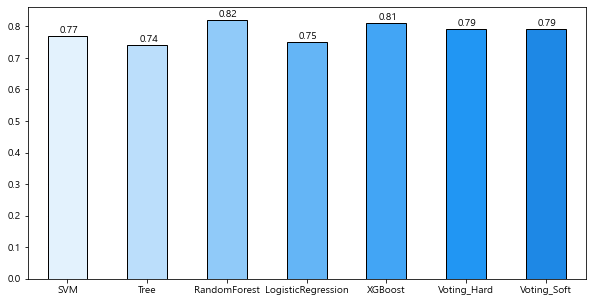

In [13]:
total_accuracy = pd.Series([0.77, 0.74, 0.82, 0.75, 0.81, 0.79, 0.79]
                  ,index=["SVM", "Tree", 'RandomForest', 'LogisticRegression', 'XGBoost','Voting_Hard','Voting_Soft'])
colors=['#E3F2FD', '#BBDEFB', '#90CAF9', '#64B5F6', '#42A5F5','#2196F3', '#1E88E5']
total_accuracy.T.plot.bar(figsize=(10,5),rot=0, edgecolor = 'black',color=colors)
for i, j in enumerate(total_accuracy):
    plt.text(i-0.1, j+0.01, j)